---

---




> `lambda _df :`를 잘 활용하고, MultiIndex와 tidydata에 대해서 더 깊게 이해해보자!

## 1. 라이브러리 imports

In [ ]:
#!pip install plotnine

In [5]:
import pandas as pd
import numpy as np
from plotnine import *

## 2. Pandas - `lambda df:`의 활용

### **A. `lambda df:` with indexer**
---




\- ref : https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-callable


\- `예시1` : 아래와 같은 데이터프레임이 있다고 할 때, 표현 1,2,3은 모두 같은 문법이다.

In [6]:
df = pd.DataFrame({'A':[-1,np.nan,1,1],'B':[2,3,np.nan,4],'C':[np.nan,4,5,6]})
df

,A,B,C
0,-1.0,2.0,NaN
1,NaN,3.0,4.0
2,1.0,NaN,5.0
3,1.0,4.0,6.0


* (표현 1)

In [7]:
df[df.A.isna()]

,A,B,C
1,NaN,3.0,4.0


* (표현 2)

In [9]:
df[(lambda _df: _df.A.isna())(df)]  ## 함수를 직접 지정해서 넣어주는 경우

,A,B,C
1,NaN,3.0,4.0


> 변환하는 함수를 지정해서 직접 지정해주는 것이다.

In [12]:
f = lambda _df: _df.A.isna()
df[f(df)]

,A,B,C
1,NaN,3.0,4.0


> 그런데, f에 아무런 값도 입력하지 않을 시 디폴트로 현재 처리하고 있는 DataFrame이 입력이 된다.

* (표현 3)

In [8]:
df[lambda _df: _df.A.isna()]    ## 관례적으로 df나 _df로 쓸 뿐, 아무 변수나 입력해도 상관은 없다.

,A,B,C
1,NaN,3.0,4.0


`예시2` : 예시1의 (표현 3)은 `.loc`, `.iloc`에서도 가능함

> `df[함수비슷한 것]` = `df.loc[함수 비슷한 것]` = `df.iloc[함수 비슷한 것]`

In [13]:
df = pd.DataFrame({'A':[-1,np.nan,1,1],'B':[2,3,np.nan,4],'C':[np.nan,4,5,6]})
df

,A,B,C
0,-1.0,2.0,NaN
1,NaN,3.0,4.0
2,1.0,NaN,5.0
3,1.0,4.0,6.0


In [15]:
df.loc[lambda _df: _df.A.isna()]    ## df.loc[lambda _df: _df.A.isna(), :]

,A,B,C
1,NaN,3.0,4.0


In [19]:
df.iloc[lambda _df: list(_df.A.isna()), :]    ## lambda _df: _df.A.isna()는 시리즈의 형태로 반환하는 것이기 때문에 리스트로 변환해서 넣어야 적용된다.

,A,B,C
1,NaN,3.0,4.0


In [20]:
(lambda _df: _df.A.isna())(df)

0    False
1     True
2    False
3    False
Name: A, dtype: bool

> 그냥 왠만해선 `.loc`을 사용하거나 시리즈를 `list`로 묶어주자...

`예시3` : 왜 이런 문법이 있을까? 연속적으로 dataframe을 변화시킬 경우 유리한 테크닉임

In [21]:
df = pd.DataFrame({'A':[-1,np.nan,1,1],'B':[2,3,np.nan,4],'C':[np.nan,4,5,6]})
df

,A,B,C
0,-1.0,2.0,NaN
1,NaN,3.0,4.0
2,1.0,NaN,5.0
3,1.0,4.0,6.0


In [22]:
df.assign(D = df.A + df.B + df.C)

,A,B,C,D
0,-1.0,2.0,NaN,NaN
1,NaN,3.0,4.0,NaN
2,1.0,NaN,5.0,NaN
3,1.0,4.0,6.0,11.0


> 여기에서 결측치의 값이 50%가 넘는 열만 고르고 싶다면?

In [25]:
df.assign(D = df.A + df.B + df.C).isna().mean() > 0.5

A    False
B    False
C    False
D     True
dtype: bool

In [30]:
df.assign(D = df.A + df.B + df.C).loc[:, lambda _df: list(_df.isna().mean() > 0.5)]

,D
0,NaN
1,NaN
2,NaN
3,11.0


### **B. `lambda df:` with assign**
---




`예시1`

In [31]:
df = pd.DataFrame({'A':[-1,np.nan,1,1],'B':[2,3,np.nan,4],'C':[np.nan,4,5,6]})
df

,A,B,C
0,-1.0,2.0,NaN
1,NaN,3.0,4.0
2,1.0,NaN,5.0
3,1.0,4.0,6.0


In [32]:
df.assign(D = df.A + df.B + df.C)

,A,B,C,D
0,-1.0,2.0,NaN,NaN
1,NaN,3.0,4.0,NaN
2,1.0,NaN,5.0,NaN
3,1.0,4.0,6.0,11.0


> 여기에서 결측치의 값을 row-wise하게 count하여 새로운 열 `E`에 할당하고 싶다면?

In [34]:
df.assign(D = df.A + df.B + df.C).isna().sum(axis = 1)  ## missing의 갯수를 산출

0    2
1    2
2    2
3    0
dtype: int64

In [36]:
df.assign(D = df.A + df.B + df.C).assign(E = lambda _df: _df.isna().sum(axis = 1))

,A,B,C,D,E
0,-1.0,2.0,NaN,NaN,2
1,NaN,3.0,4.0,NaN,2
2,1.0,NaN,5.0,NaN,2
3,1.0,4.0,6.0,11.0,0


`예시2` 원본 데이터를 손상시키지 않으며 데이터를 변형하고 싶을 때

In [37]:
np.random.seed(43052)
df = pd.DataFrame({'A':[12,234,3456,12345,654222]})
df

,A
0,12
1,234
2,3456
3,12345
4,654222


(풀이1) - 복사본 생성(실패)

In [38]:
df2 = df
df2

,A
0,12
1,234
2,3456
3,12345
4,654222


In [39]:
df2['B'] = np.log(df.A)
df2['C'] = (df2.B - df2.B.mean())/df2.B.std()

df2

,A,B,C
0,12,2.484907,-1.286574
1,234,5.455321,-0.564847
2,3456,8.147867,0.089367
3,12345,9.421006,0.398704
4,654222,13.391202,1.363350


In [40]:
df

,A,B,C
0,12,2.484907,-1.286574
1,234,5.455321,-0.564847
2,3456,8.147867,0.089367
3,12345,9.421006,0.398704
4,654222,13.391202,1.363350


> ??? 둘 다 같은 변수로 저장이 된 모습

이게 왜 이렇게 될까?

(풀이 2) - 복사본 생성(성공)

In [41]:
np.random.seed(43052)
df = pd.DataFrame({'A':[12,234,3456,12345,654222]})
df

,A
0,12
1,234
2,3456
3,12345
4,654222


In [42]:
df2 = df.copy()

In [55]:
df

,A
0,12
1,234
2,3456
3,12345
4,654222


In [43]:
df2['B'] = np.log(df2.A)
df2['C'] = (df2.B - df2.B.mean())/df2.B.std()

df2

,A,B,C
0,12,2.484907,-1.286574
1,234,5.455321,-0.564847
2,3456,8.147867,0.089367
3,12345,9.421006,0.398704
4,654222,13.391202,1.363350


In [44]:
df

,A
0,12
1,234
2,3456
3,12345
4,654222


> 원본 데이터를 손상시키지 않는다.

(풀이 3) - `assign` + `lambda df:`이용

In [46]:
df.assign(B = lambda _df : np.log(df.A)).assign(C = lambda _df : (_df.B - _df.B.mean())/_df.B.std())

,A,B,C
0,12,2.484907,-1.286574
1,234,5.455321,-0.564847
2,3456,8.147867,0.089367
3,12345,9.421006,0.398704
4,654222,13.391202,1.363350


In [47]:
df

,A
0,12
1,234
2,3456
3,12345
4,654222


(풀이 4) - `eval`이용

In [48]:
df.eval('B = log(A)').eval('C = (B - B.mean())/B.std()')

,A,B,C
0,12,2.484907,-1.286574
1,234,5.455321,-0.564847
2,3456,8.147867,0.089367
3,12345,9.421006,0.398704
4,654222,13.391202,1.363350


In [49]:
df

,A
0,12
1,234
2,3456
3,12345
4,654222


> 허나, eval expression에서 지원하는 함수는 한계가 있다.(sin, cos는 지원되는데 tan은 안된다거나...)

## 3. Pandas - Multi-Index의 이해

### **A. 원래 `df`, `s`는 딕셔너리 계열임**
---




\- 예시1 : df는 dct에서 만들 수 있음

In [56]:
dct = {'A': [1,2,3],'B': [2,3,4]}
df = pd.DataFrame(dct)
df

,A,B
0,1,2
1,2,3
2,3,4


In [58]:
print(dct['A'])
print(list(df['A']))

[1, 2, 3]
[1, 2, 3]


\- 예시2 : s도 dct에서 만들 수 있음

In [59]:
dct = {'43052': 80, '43053': 90, '43054': 50}   ## key가 index가 된다.
s = pd.Series(dct)
s

43052    80
43053    90
43054    50
dtype: int64

In [61]:
print(s['43052'])
print(dct['43052'])

80
80


\- 예시3 : dict의 키로 올 수 있는 것들

* 튜플로 dict를 만든다면?

In [62]:
dct = {('43052',4): 80, ('43053',1): 90, ('43054',2): 50} # (학번,학년)
s = pd.Series(dct)
s

43052  4    80
43053  1    90
43054  2    50
dtype: int64

In [63]:
s.index

MultiIndex([('43052', 4),
            ('43053', 1),
            ('43054', 2)],
           )

> MultiIndex가 나온다.

### **B. `.index` 혹은 `.columns`에 `name`이 있는 경우**
---




`예시 1` : index에 이름이 있는 경우`['id']`

In [73]:
dct = {'43052': 80, '43053': 90, '43054': 50}
s = pd.Series(dct)
s

43052    80
43053    90
43054    50
dtype: int64

In [76]:
s.rename_axis(['id'])

id
43052    80
43053    90
43054    50
dtype: int64

In [70]:
s.index, s.rename_axis(['id']).index

(Index(['43052', '43053', '43054'], dtype='object'),
 Index(['43052', '43053', '43054'], dtype='object', name='id'))

> title을 설정할 수도 있다.

`예시 2` : index에 이름이 있는 경우`['id','year']`

In [77]:
dct = {('43052',4): 80, ('43053',1): 90, ('43054',2): 50} # (학번,학년)
s = pd.Series(dct)
s.rename_axis(['id','year'])

id     year
43052  4       80
43053  1       90
43054  2       50
dtype: int64

> MultiIndex에서 인덱스의 이름을 각각 지정해준 경우이다.

In [79]:
s.rename_axis(['id','year']).index

MultiIndex([('43052', 4),
            ('43053', 1),
            ('43054', 2)],
           names=['id', 'year'])

`예시3` : 예시2가 데이터프레임이라면 이렇게 보인다.

In [80]:
dct = {('43052',4): 80, ('43053',1): 90, ('43054',2): 50} # (학번,학년)
s = pd.Series(dct)
df = pd.DataFrame(s.rename_axis(['id','year']))
df

,,0
id,year,
43052,4,80
43053,1,90
43054,2,50


dct를 바로 dataframe으로 바꾸는 건 안되나봄

In [81]:
df.columns

RangeIndex(start=0, stop=1, step=1)

In [82]:
df.index

MultiIndex([('43052', 4),
            ('43053', 1),
            ('43054', 2)],
           names=['id', 'year'])

> 하나의 컬럼이 있고 두 개의 중첩된 인덱스가 있는 형태이다.

`예시4` : 심슨의 역설 - 전체

In [85]:
df=pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])\
.stack().stack().reset_index()\
.rename({'level_0':'department','level_1':'result','level_2':'gender',0:'count'},axis=1).pivot_table(index='gender', columns='result', values='count', aggfunc=sum)
df

result,fail,pass
gender,,
female,1063,772
male,1291,1400


In [86]:
df.index, df.columns

(Index(['female', 'male'], dtype='object', name='gender'),
 Index(['fail', 'pass'], dtype='object', name='result'))

> index도 이름이 있고, columns도 이름이 있는 경우.

1열과 2열을 더하고 싶다면? 단순히 아래와 같이 하면 됨.

*`gender`,`result`는 각각 index의 이름, columns의 이름일 뿐, 아무 신경 쓸 필요 없음*

In [87]:
df['fail'] + df['pass']

gender
female    1835
male      2691
dtype: int64

`예시2` : 심슨의 역설 - 학과별

In [103]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])\
.stack().stack().reset_index()\
.rename({'level_0':'department','level_1':'result','level_2':'gender',0:'count'},axis=1).pivot_table(index=['gender','department'], columns='result',values='count',aggfunc=sum)
df

result             fail  pass
gender department            
female A             19    89
       B              7    18
       C            391   202
       D            244   131
       E            299    94
       F            103   238
male   A            314   511
       B            208   352
       C            204   121
       D            279   138
       E            137    54
       F            149   224

In [101]:
df.index

MultiIndex([('female', 'A'),
            ('female', 'B'),
            ('female', 'C'),
            ('female', 'D'),
            ('female', 'E'),
            ('female', 'F'),
            (  'male', 'A'),
            (  'male', 'B'),
            (  'male', 'C'),
            (  'male', 'D'),
            (  'male', 'E'),
            (  'male', 'F')],
           names=['gender', 'department'])

> 그냥 단순한 멀티인덱스. tuple을 입력하여 호출하면 된다.

## 4. Pandas - tidydata

### **A. tidydata의 개념**
---




\- 아래의 자료는 불리하다.

In [121]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])\
.stack().stack().reset_index()\
.rename({'level_0':'department','level_1':'result','level_2':'gender',0:'count'},axis=1).pivot_table(index=['gender','department'], columns='result',values='count',aggfunc=sum)
df

result             fail  pass
gender department            
female A             19    89
       B              7    18
       C            391   202
       D            244   131
       E            299    94
       F            103   238
male   A            314   511
       B            208   352
       C            204   121
       D            279   138
       E            137    54
       F            149   224

\- 가정1 : 만약에 A학과에 해당하는 결과만 뽑고 싶다면? -> department가 column으로 있어야 함...

\- 가정2 : 이 데이터를 바탕으로 합격한 사람만 bar plot을 그리고 싶다면? -> department, gender, pass가 column으로 있어야 함...

> 원하는 정보를 쉽게 뽑아낼 수 있는 데이터를 tidydata라고 함

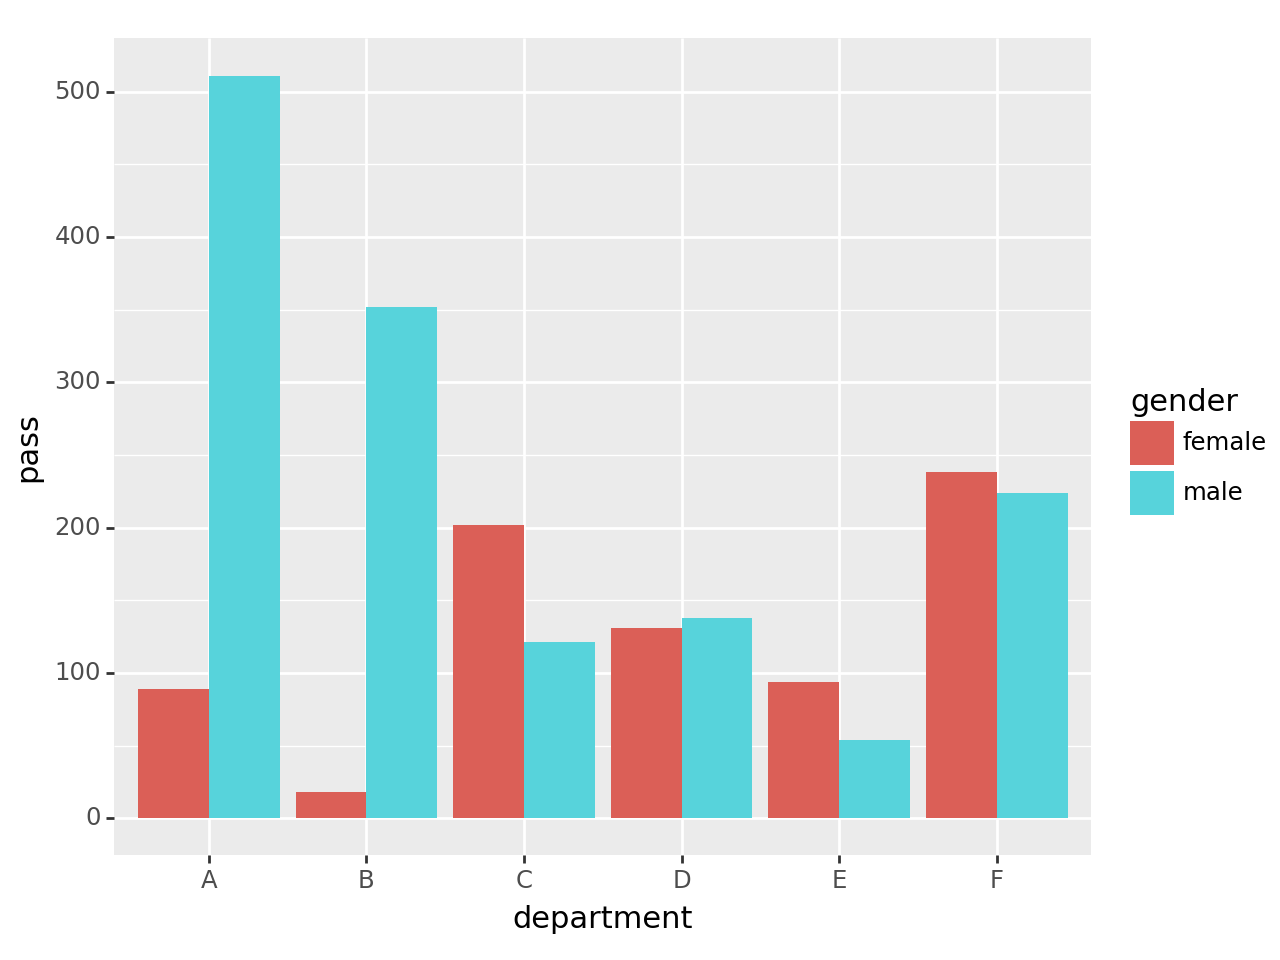

<Figure Size: (640 x 480)>

In [123]:
tidydata = df['pass'].reset_index()
#---#
fig = ggplot(tidydata)
col = geom_col(aes(x='department',y='pass',fill='gender'),position='dodge')   ## dodge 설정으로 누적으로 표기하지 않고 옆에 늘여서 표시
fig + col

\- tidydata 정의

  1. Each variable must have its own column.
  1. Each observation must have its own row.
  1. Each value must have its own cell.

### **B. tidydata가 아닌 예시**
---




`예시1` - MultiIndex 구조를 가지면 무조건 tidydata가 아니다.

In [124]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])\
.stack().stack().reset_index()\
.rename({'level_0':'department','level_1':'result','level_2':'gender',0:'count'},axis=1).pivot_table(index=['gender','department'], columns='result',values='count',aggfunc=sum)
df

result             fail  pass
gender department            
female A             19    89
       B              7    18
       C            391   202
       D            244   131
       E            299    94
       F            103   238
male   A            314   511
       B            208   352
       C            204   121
       D            279   138
       E            137    54
       F            149   224

> tidydata 아님

> variable이 column이 아닌 index를 차지하고 있음.
>
> result가 column의 title로 지정되어 있음.
>
> 한 행에 두 개 이상의 정보가 포함되어 있음.

In [125]:
tidydata = df.stack().reset_index().rename({0:'applicant_count'},axis=1)
tidydata

,gender,department,result,applicant_count
0,female,A,fail,19
1,female,A,pass,89
2,female,B,fail,7
3,female,B,pass,18
4,female,C,fail,391
5,female,C,pass,202
6,female,D,fail,244
7,female,D,pass,131
8,female,E,fail,299
9,female,E,pass,94


* tidydata

\- 직관에 의한 설명

* query쓰기 불편
* 시각화하기 불편
* ...아무튼 다루기 불편!

`예시2` - 아래의 자료는 tidydata가 아니다.

In [126]:
df=pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])\
.stack().stack().reset_index()\
.rename({'level_0':'department','level_1':'result','level_2':'gender',0:'count'},axis=1).pivot_table(index='gender', columns='result', values='count', aggfunc=sum)\
.assign(pass_fail = lambda df: list(map(lambda x,y: (y,x),df['fail'],df['pass']))).drop(['fail','pass'],axis=1).reset_index()
df

result,gender,pass_fail
0,female,"(772, 1063)"
1,male,"(1400, 1291)"


> 딱봐도 하자가 있어보임...

`예시3` - wide df

In [128]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,461,324,136,109,76,81,43,37,135,28,39,14,22,17,20,17
1,2019-11,461,358,167,141,86,61,29,36,141,27,29,20,23,10,19,27
2,2019-12,426,383,143,105,53,45,51,48,129,30,20,26,28,18,18,19
3,2020-01,677,494,212,187,110,79,65,49,158,23,13,19,19,22,27,22
4,2020-02,593,520,217,195,112,67,62,71,157,25,18,16,24,18,23,20
5,2020-03,637,537,246,187,92,66,59,67,145,21,16,24,18,31,22,14
6,2020-04,647,583,222,154,98,59,48,64,113,20,23,25,19,19,23,21
7,2020-05,629,518,192,176,91,87,50,66,150,43,27,15,18,19,19,13
8,2020-06,663,552,209,185,93,69,54,60,140,39,16,16,17,29,25,16
9,2020-07,599,471,214,193,89,78,65,59,130,40,27,25,21,18,18,12


> 잘 정리된 것 같긴 한데,,, 근데 tidydata가 아님.

**`df.melt()`**

In [129]:
tidydata = df.melt(id_vars='Date').assign(Date = lambda _df: _df.Date.apply(pd.to_datetime))  ## Date를 Date type으로 변경
tidydata

,Date,variable,value
0,2019-10-01,Samsung,461
1,2019-11-01,Samsung,461
2,2019-12-01,Samsung,426
3,2020-01-01,Samsung,677
4,2020-02-01,Samsung,593
...,...,...,...
203,2020-06-01,Asus,16
204,2020-07-01,Asus,12
205,2020-08-01,Asus,20
206,2020-09-01,Asus,15


> 회사의 이름에 대한 변수가 하나의 column을 차지하고 있지 않음.

## 6. Pandas - `melt`/`stack`

### **A. `reset_index()`**
---




> 중첩구조를 가지는 Series일 경우 `reset_index()`를 사용하면 쉽게 tidydata를 얻을 수 있다.

\- 예시 1

In [131]:
dct = {'43052': 80, '43053': 90, '43054': 50}
s = pd.Series(dct)
s

43052    80
43053    90
43054    50
dtype: int64

In [132]:
s.reset_index()

,index,0
0,43052,80
1,43053,90
2,43054,50


\- 예시2

In [133]:
dct = {('43052',4): 80, ('43053',1): 90, ('43054',2): 50} # (학번,학년)
s = pd.Series(dct)
s

43052  4    80
43053  1    90
43054  2    50
dtype: int64

In [134]:
s.reset_index()

,level_0,level_1,0
0,43052,4,80
1,43053,1,90
2,43054,2,50


\- 예시3

In [135]:
df=pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1]).stack().stack()
df

A  fail  female     19
         male      314
   pass  female     89
         male      511
B  fail  female      7
         male      208
   pass  female     18
         male      352
C  fail  female    391
         male      204
   pass  female    202
         male      121
D  fail  female    244
         male      279
   pass  female    131
         male      138
E  fail  female    299
         male      137
   pass  female     94
         male       54
F  fail  female    103
         male      149
   pass  female    238
         male      224
dtype: int64

In [137]:
df.reset_index().set_axis(['department', 'result', 'gender', 'count'], axis = 1)

,department,result,gender,count
0,A,fail,female,19
1,A,fail,male,314
2,A,pass,female,89
3,A,pass,male,511
4,B,fail,female,7
5,B,fail,male,208
6,B,pass,female,18
7,B,pass,male,352
8,C,fail,female,391
9,C,fail,male,204


* `reset_index()`는 데이터프레임과 시리즈 모두, 인덱스를 가지고 있다면 사용할 수 있다.

### **B. `melt()` | wide df 원툴**
---




`# 예시1`: 아래의 자료를 tidydata로 만들라.

In [138]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,461,324,136,109,76,81,43,37,135,28,39,14,22,17,20,17
1,2019-11,461,358,167,141,86,61,29,36,141,27,29,20,23,10,19,27
2,2019-12,426,383,143,105,53,45,51,48,129,30,20,26,28,18,18,19
3,2020-01,677,494,212,187,110,79,65,49,158,23,13,19,19,22,27,22
4,2020-02,593,520,217,195,112,67,62,71,157,25,18,16,24,18,23,20
5,2020-03,637,537,246,187,92,66,59,67,145,21,16,24,18,31,22,14
6,2020-04,647,583,222,154,98,59,48,64,113,20,23,25,19,19,23,21
7,2020-05,629,518,192,176,91,87,50,66,150,43,27,15,18,19,19,13
8,2020-06,663,552,209,185,93,69,54,60,140,39,16,16,17,29,25,16
9,2020-07,599,471,214,193,89,78,65,59,130,40,27,25,21,18,18,12


(풀이1) - 실패

In [144]:
df.melt().head(30)

,variable,value
0,Date,2019-10
1,Date,2019-11
2,Date,2019-12
3,Date,2020-01
4,Date,2020-02
5,Date,2020-03
6,Date,2020-04
7,Date,2020-05
8,Date,2020-06
9,Date,2020-07


> 잘 될뻔 했던 것 같은데, Date를 같이 넣어둔 것이 좀 아쉬움

(풀이2) - `.melt(id_vars = 'Date')` 성공

In [149]:
df.melt(id_vars = 'Date')

,Date,variable,value
0,2019-10,Samsung,461
1,2019-11,Samsung,461
2,2019-12,Samsung,426
3,2020-01,Samsung,677
4,2020-02,Samsung,593
...,...,...,...
203,2020-06,Asus,16
204,2020-07,Asus,12
205,2020-08,Asus,20
206,2020-09,Asus,15


> wide 형태의 dataframe을 아주 쉽게 tidydata로 바꿀 수 있다.

### **C. `stack()` + `reset_index()`**
---




> DataFrame을 MultiIndex를 가지는 Series로 "일부러" 변환하고 reset_index()를 시킴

`# 예시1` : 아래의 자료를 tidydata로 만들자

In [150]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,461,324,136,109,76,81,43,37,135,28,39,14,22,17,20,17
1,2019-11,461,358,167,141,86,61,29,36,141,27,29,20,23,10,19,27
2,2019-12,426,383,143,105,53,45,51,48,129,30,20,26,28,18,18,19
3,2020-01,677,494,212,187,110,79,65,49,158,23,13,19,19,22,27,22
4,2020-02,593,520,217,195,112,67,62,71,157,25,18,16,24,18,23,20
5,2020-03,637,537,246,187,92,66,59,67,145,21,16,24,18,31,22,14
6,2020-04,647,583,222,154,98,59,48,64,113,20,23,25,19,19,23,21
7,2020-05,629,518,192,176,91,87,50,66,150,43,27,15,18,19,19,13
8,2020-06,663,552,209,185,93,69,54,60,140,39,16,16,17,29,25,16
9,2020-07,599,471,214,193,89,78,65,59,130,40,27,25,21,18,18,12


In [157]:
df.set_index('Date').stack()  ## 행들을 인덱스로 스택해버림

Date            
2019-10  Samsung    461
         Apple      324
         Huawei     136
         Xiaomi     109
         Oppo        76
                   ... 
2020-10  Nokia       20
         Lenovo      22
         OnePlus      9
         Sony        22
         Asus        21
Length: 208, dtype: int64

> 데이터들을 멀티 인덱스로 만들어버렸다.

In [158]:
df.set_index('Date').stack().reset_index()

,Date,level_1,0
0,2019-10,Samsung,461
1,2019-10,Apple,324
2,2019-10,Huawei,136
3,2019-10,Xiaomi,109
4,2019-10,Oppo,76
...,...,...,...
203,2020-10,Nokia,20
204,2020-10,Lenovo,22
205,2020-10,OnePlus,9
206,2020-10,Sony,22


> 그럼 `reset_index()`만 하면 바로 해결된다.

`# 예시2` : 아래의 자료를 tidydata로 만들어라.

In [159]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])
df

male      female     
  fail pass   fail pass
A  314  511     19   89
B  208  352      7   18
C  204  121    391  202
D  279  138    244  131
E  137   54    299   94
F  149  224    103  238

In [160]:
df.columns

MultiIndex([(  'male', 'fail'),
            (  'male', 'pass'),
            ('female', 'fail'),
            ('female', 'pass')],
           )

> column이 중첩되어 있는 상황.

In [161]:
df.stack()

female  male
A fail      19   314
  pass      89   511
B fail       7   208
  pass      18   352
C fail     391   204
  pass     202   121
D fail     244   279
  pass     131   138
E fail     299   137
  pass      94    54
F fail     103   149
  pass     238   224

In [163]:
df.stack().stack()

A  fail  female     19
         male      314
   pass  female     89
         male      511
B  fail  female      7
         male      208
   pass  female     18
         male      352
C  fail  female    391
         male      204
   pass  female    202
         male      121
D  fail  female    244
         male      279
   pass  female    131
         male      138
E  fail  female    299
         male      137
   pass  female     94
         male       54
F  fail  female    103
         male      149
   pass  female    238
         male      224
dtype: int64

> 3중 멀티 인덱스로 변환시켜버렸다.

In [164]:
df.stack().stack().reset_index()

,level_0,level_1,level_2,0
0,A,fail,female,19
1,A,fail,male,314
2,A,pass,female,89
3,A,pass,male,511
4,B,fail,female,7
5,B,fail,male,208
6,B,pass,female,18
7,B,pass,male,352
8,C,fail,female,391
9,C,fail,male,204


> 바로 tidydata가 나와버리는 모습

### **D. `unstack()` + `reset_index()`**
---




In [170]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])
df

male      female     
  fail pass   fail pass
A  314  511     19   89
B  208  352      7   18
C  204  121    391  202
D  279  138    244  131
E  137   54    299   94
F  149  224    103  238

In [173]:
df.unstack()    ## 위쪽 컬럼에 인덱스가 몰린 상황, 똑같이 작용하긴 한다.(순서는 좀 다름)

male    fail  A    314
              B    208
              C    204
              D    279
              E    137
              F    149
        pass  A    511
              B    352
              C    121
              D    138
              E     54
              F    224
female  fail  A     19
              B      7
              C    391
              D    244
              E    299
              F    103
        pass  A     89
              B     18
              C    202
              D    131
              E     94
              F    238
dtype: int64

`# 예시1` - `.stack()`과 `.unstack()`은 반대연산

In [175]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/flights.csv')\
.groupby(["AIRLINE","WEEKDAY"]).agg({"CANCELLED":[np.mean,"count"],"DIVERTED":[np.mean,"count"]})
df

CANCELLED        DIVERTED      
                     mean count      mean count
AIRLINE WEEKDAY                                
AA      1        0.032106  1277  0.004699  1277
        2        0.007341  1226  0.001631  1226
        3        0.011949  1339  0.001494  1339
        4        0.015004  1333  0.003751  1333
        5        0.014151  1272  0.000786  1272
...                   ...   ...       ...   ...
WN      3        0.014118  1275  0.001569  1275
        4        0.007911  1264  0.003165  1264
        5        0.005828  1201  0.000000  1201
        6        0.010132   987  0.003040   987
        7        0.006066  1154  0.002600  1154

[98 rows x 4 columns]

In [177]:
df.stack().unstack()

CANCELLED          DIVERTED        
                     mean   count      mean   count
AIRLINE WEEKDAY                                    
AA      1        0.032106  1277.0  0.004699  1277.0
        2        0.007341  1226.0  0.001631  1226.0
        3        0.011949  1339.0  0.001494  1339.0
        4        0.015004  1333.0  0.003751  1333.0
        5        0.014151  1272.0  0.000786  1272.0
...                   ...     ...       ...     ...
WN      3        0.014118  1275.0  0.001569  1275.0
        4        0.007911  1264.0  0.003165  1264.0
        5        0.005828  1201.0  0.000000  1201.0
        6        0.010132   987.0  0.003040   987.0
        7        0.006066  1154.0  0.002600  1154.0

[98 rows x 4 columns]

> 똑같음

In [178]:
df.stack().stack()

AIRLINE  WEEKDAY                  
AA       1        mean   CANCELLED       0.032106
                         DIVERTED        0.004699
                  count  CANCELLED    1277.000000
                         DIVERTED     1277.000000
         2        mean   CANCELLED       0.007341
                                         ...     
WN       6        count  DIVERTED      987.000000
         7        mean   CANCELLED       0.006066
                         DIVERTED        0.002600
                  count  CANCELLED    1154.000000
                         DIVERTED     1154.000000
Length: 392, dtype: float64

> Series의 형태가 되었으므로 reset_index를 해주면...

In [179]:
df.stack().stack().reset_index()

,AIRLINE,WEEKDAY,level_2,level_3,0
0,AA,1,mean,CANCELLED,0.032106
1,AA,1,mean,DIVERTED,0.004699
2,AA,1,count,CANCELLED,1277.000000
3,AA,1,count,DIVERTED,1277.000000
4,AA,2,mean,CANCELLED,0.007341
...,...,...,...,...,...
387,WN,6,count,DIVERTED,987.000000
388,WN,7,mean,CANCELLED,0.006066
389,WN,7,mean,DIVERTED,0.002600
390,WN,7,count,CANCELLED,1154.000000


`# 예시2`

In [180]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/flights.csv')\
.groupby(["AIRLINE","WEEKDAY"]).agg({"CANCELLED":[np.mean,"count"],"DIVERTED":[np.mean,"count"]})
df

CANCELLED        DIVERTED      
                     mean count      mean count
AIRLINE WEEKDAY                                
AA      1        0.032106  1277  0.004699  1277
        2        0.007341  1226  0.001631  1226
        3        0.011949  1339  0.001494  1339
        4        0.015004  1333  0.003751  1333
        5        0.014151  1272  0.000786  1272
...                   ...   ...       ...   ...
WN      3        0.014118  1275  0.001569  1275
        4        0.007911  1264  0.003165  1264
        5        0.005828  1201  0.000000  1201
        6        0.010132   987  0.003040   987
        7        0.006066  1154  0.002600  1154

[98 rows x 4 columns]

In [182]:
df.stack().stack().reset_index()

,AIRLINE,WEEKDAY,level_2,level_3,0
0,AA,1,mean,CANCELLED,0.032106
1,AA,1,mean,DIVERTED,0.004699
2,AA,1,count,CANCELLED,1277.000000
3,AA,1,count,DIVERTED,1277.000000
4,AA,2,mean,CANCELLED,0.007341
...,...,...,...,...,...
387,WN,6,count,DIVERTED,987.000000
388,WN,7,mean,CANCELLED,0.006066
389,WN,7,mean,DIVERTED,0.002600
390,WN,7,count,CANCELLED,1154.000000


`# 예시3`

In [183]:
df=pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])
df

male      female     
  fail pass   fail pass
A  314  511     19   89
B  208  352      7   18
C  204  121    391  202
D  279  138    244  131
E  137   54    299   94
F  149  224    103  238

In [184]:
df.stack().stack().reset_index()

,level_0,level_1,level_2,0
0,A,fail,female,19
1,A,fail,male,314
2,A,pass,female,89
3,A,pass,male,511
4,B,fail,female,7
5,B,fail,male,208
6,B,pass,female,18
7,B,pass,male,352
8,C,fail,female,391
9,C,fail,male,204
